In [1]:
df<-read.csv('d:/data/soccer/player.csv')
head(df)

id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0
6,Aaron Hunt,1986-09-04,left,33,183,161,76,0,1,...,76,75,78,14,7,9,9,12,74,1


In [2]:
library(dplyr)
df<- df %>% select(-id,-player_name,-birthday,-preferred_foot,
                  -overall_rating)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 10935    40

age,height,weight,potential,right_foot,left_foot,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Label
27,183,187,71,1,0,49,44,71,61,...,48,65,69,69,6,11,10,8,8,0
30,170,146,71,1,0,49,44,71,61,...,48,65,69,69,6,11,10,8,8,0
28,170,163,66,1,0,49,44,71,61,...,48,65,66,69,6,11,10,8,8,0
37,183,198,65,1,0,48,43,70,60,...,47,62,63,66,5,10,9,7,7,0
40,183,154,65,1,0,48,43,70,60,...,47,62,63,66,5,10,9,7,7,0
33,183,161,76,0,1,80,53,58,71,...,59,76,75,78,14,7,9,9,12,1


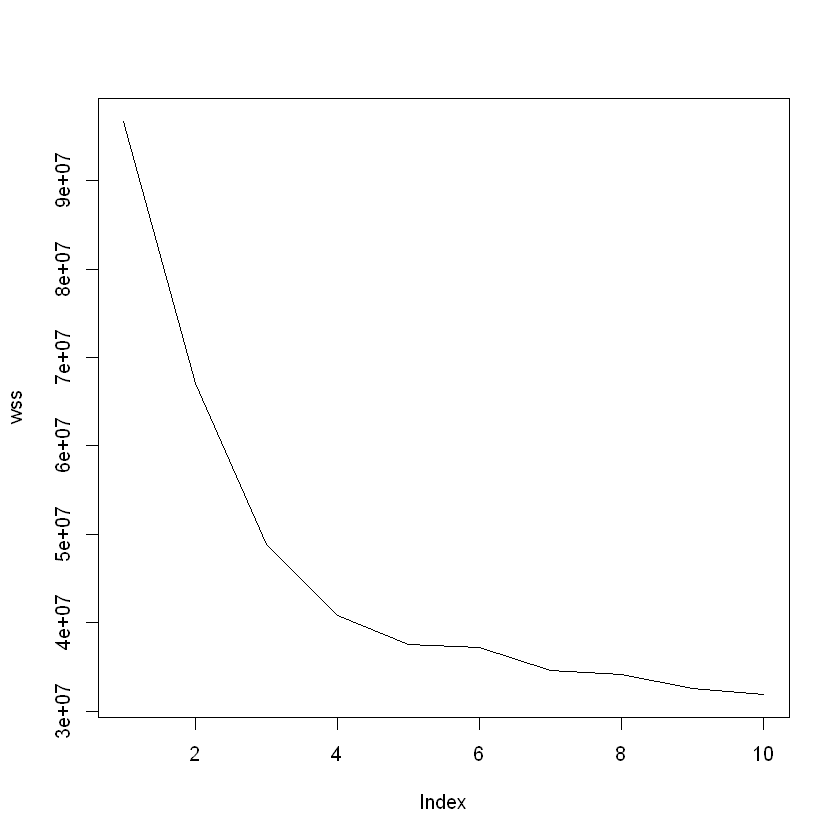

In [5]:
#1.wss
set.seed(123)
result<-NULL
for(k in 1:10){
    result[[k]]<-kmeans(df[,-40],k)
}
wss<-numeric(10)
for (k in 1:10){
    wss[k]<-result[[k]]$tot.withinss
}
plot(wss,type='l') #엘보우 포인트 확인

[1] 0.1446413

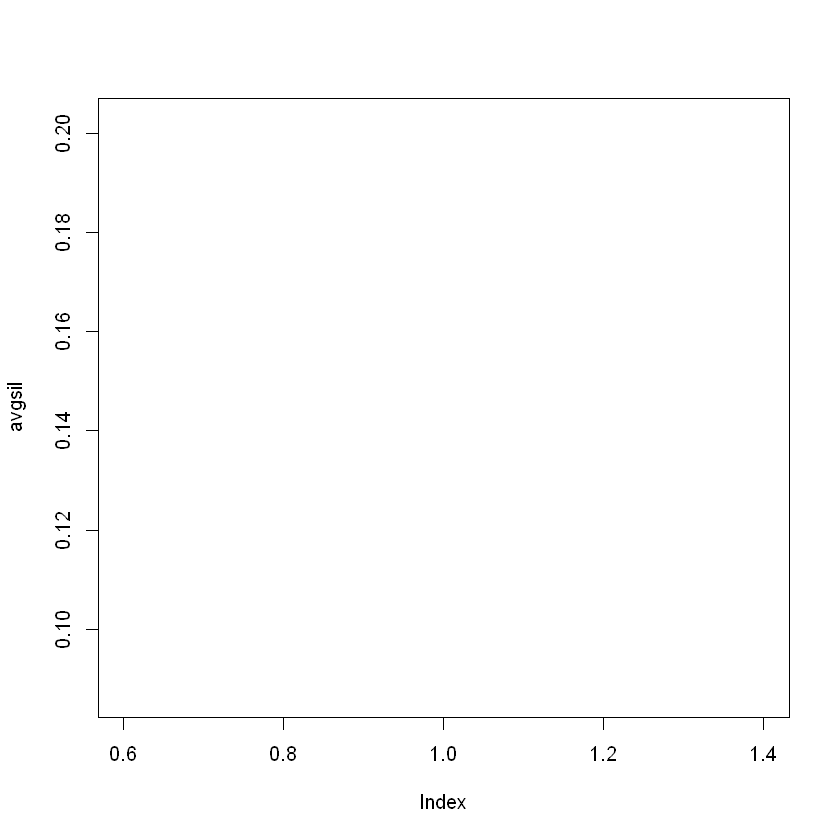

In [7]:
#2.실루엣포인트
library(cluster)
avgsil<-numeric(10)
for(k in 2:10){
    si<-summary(silhouette(result[[k]]$cluster,dist(df[,-40])))
    avgsil<-si$avg.width
}
max(avgsil)
plot(avgsil,type='l') #실루엣 포인트가 최대인 k값 확인

In [ ]:
library(factoextra)
fviz_nbclust(df[,-40],FUN=kmeans,method='wss')
fviz_nbclust(df[,-40],FUN=kmeans,method='silhouette')

Warning message:
"package 'factoextra' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [ ]:
#군집 갯수 3일 때의 산점도 행렬
plot(df[,-40],pch=result[[3]]$cluster,col=result[[3]]$cluster)

In [ ]:
#군집 갯수 2일 때의 산점도 행렬
plot(df[,-40],pch=result[[2]]$cluster,col=result[[2]]$cluster)

In [ ]:
#k=2일 대의 군집 모형
set.seed(123)
model<-kmeans(df[,-40],centers=2)
model
model$centers

In [ ]:
head(model$cluster-1)
head(df$Label)

In [ ]:
#model$cluster =>1,2 숫자를 팩터 타입으로 변환
df$cluster<-as.factor(model$cluster - 1)

In [ ]:
#군집모형에서 예측한 값과 실제값이 다른 경우 아래 함수 사용
convert<-function(i){
    if(i==0){
        return("l")
    }else if{i==1}{
        return("0")
    }
}
# sapply(필드,함수) 샘플의 각 필드에 함수를 호출한 값
result<-sapply(df$cluster,convert)

In [ ]:
head(df$cluster)
head(result)

In [ ]:
#실제값과 예측값 비교

# table(df$Label,df$cluster)
# mean(df$Label==df$cluster)
table(df$Label,df$result)
mean(df$Label==df$result)